<a href="https://colab.research.google.com/github/namoshi/mycolab/blob/main/autoencoder_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto Encoder for MNIST

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
#from tensoeflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
import numpy as np

encoding_dim = 32

In [9]:
# Data
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
# Model definition
input_img = Input(shape=(784,))
#model = Sequential()
#model.add(Dense(encoding_dim, input_shape=(784,)))
#model.add(Activation('softmax'))
#model.add(Dense(784))
encoded = Dense(encoding_dim, activation='softmax', name='encoded')(input_img)
decoded = Dense(784)(encoded)
model = Model(inputs=input_img, outputs=decoded)


# Pring the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
encoded (Dense)              (None, 32)                25120     
_________________________________________________________________
dense (Dense)                (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Optimizer
#sgd = SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [12]:
# training the model
nepoch=1000
results = model.fit(x_train, x_train, epochs=nepoch, batch_size=256, shuffle=True, verbose=2, 
                                        validation_data=(x_test, x_test))


# save the model
model.save_weights('autoencoder.h5')


Epoch 1/1000
235/235 - 4s - loss: 0.0774 - accuracy: 0.0060 - val_loss: 0.0630 - val_accuracy: 0.0084
Epoch 2/1000
235/235 - 1s - loss: 0.0577 - accuracy: 0.0107 - val_loss: 0.0533 - val_accuracy: 0.0147
Epoch 3/1000
235/235 - 1s - loss: 0.0497 - accuracy: 0.0156 - val_loss: 0.0471 - val_accuracy: 0.0128
Epoch 4/1000
235/235 - 1s - loss: 0.0451 - accuracy: 0.0128 - val_loss: 0.0432 - val_accuracy: 0.0105
Epoch 5/1000
235/235 - 1s - loss: 0.0419 - accuracy: 0.0113 - val_loss: 0.0407 - val_accuracy: 0.0117
Epoch 6/1000
235/235 - 1s - loss: 0.0401 - accuracy: 0.0106 - val_loss: 0.0392 - val_accuracy: 0.0113
Epoch 7/1000
235/235 - 1s - loss: 0.0388 - accuracy: 0.0108 - val_loss: 0.0380 - val_accuracy: 0.0113
Epoch 8/1000
235/235 - 1s - loss: 0.0376 - accuracy: 0.0113 - val_loss: 0.0367 - val_accuracy: 0.0095
Epoch 9/1000
235/235 - 1s - loss: 0.0364 - accuracy: 0.0114 - val_loss: 0.0358 - val_accuracy: 0.0094
Epoch 10/1000
235/235 - 1s - loss: 0.0356 - accuracy: 0.0115 - val_loss: 0.0350 - 

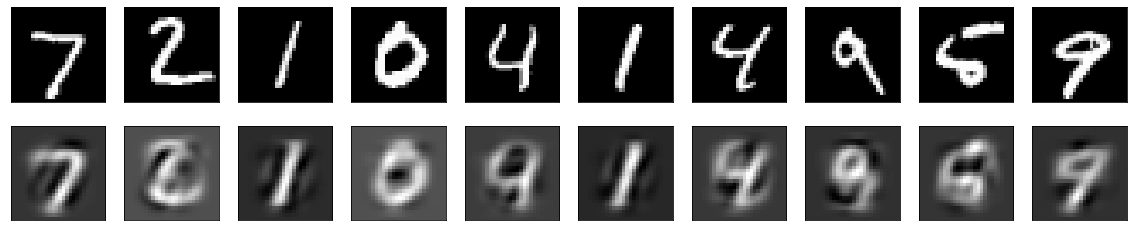

In [13]:
# display the images
%matplotlib inline
import matplotlib.pyplot as plt

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


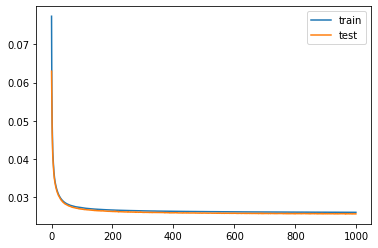

In [14]:
x = range(nepoch)
plt.plot(x, results.history['loss'], label='train')
plt.legend(loc='upper right')
plt.plot(x, results.history['val_loss'], label='test')
plt.legend(loc='upper right')

In [15]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('encoded').output)
# Pring the model
feature_extractor.summary()
encoded_features = feature_extractor.predict(x_train)
print(encoded_features)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
encoded (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
[[0.04306034 0.04422664 0.05130884 ... 0.04243932 0.05943943 0.05112468]
 [0.06236328 0.06266243 0.04910598 ... 0.03917968 0.04646875 0.07246242]
 [0.07155719 0.04075713 0.04111552 ... 0.08153845 0.04719529 0.05366142]
 ...
 [0.05590586 0.04927597 0.04477973 ... 0.07257825 0.06066526 0.05074783]
 [0.07367631 0.04189316 0.05118282 ... 0.04697126 0.04109862 0.05599394]
 [0.07920264 0.05432784 0.03812725 ... 0.05560263 0.06787092 0.0420888 ]]


Shape is  (60000, 32)
k= 0


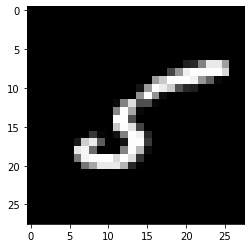

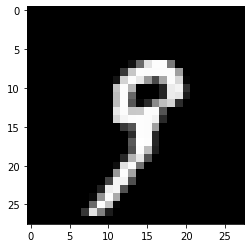

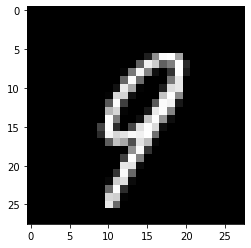

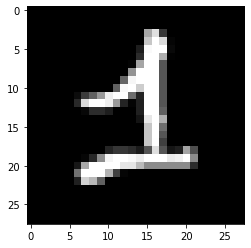

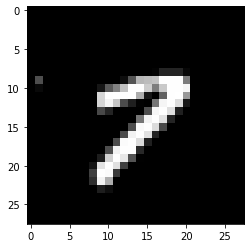

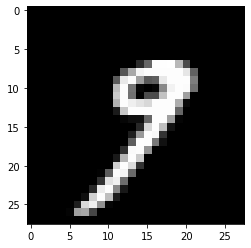

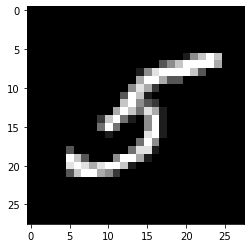

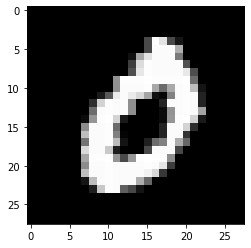

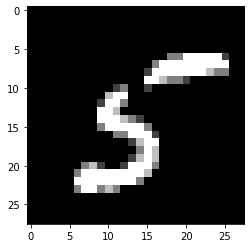

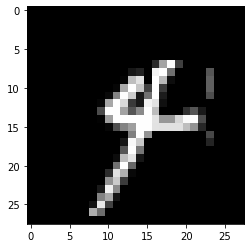

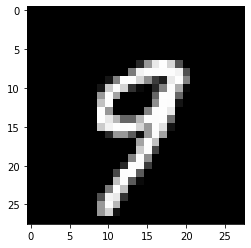

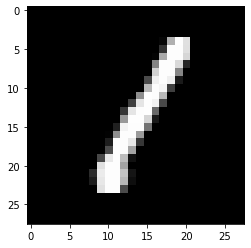

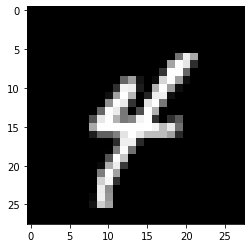

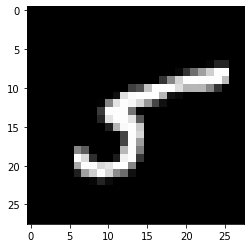

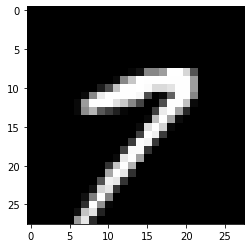

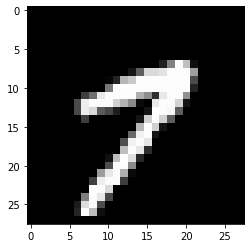

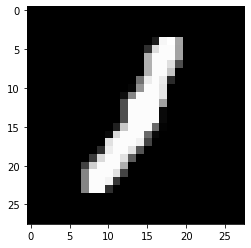

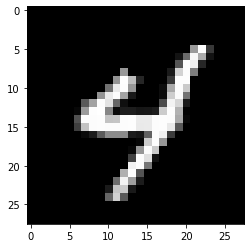

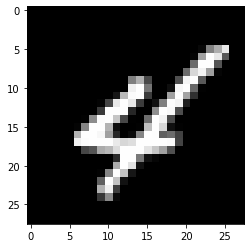

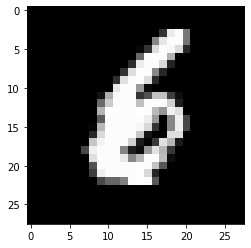

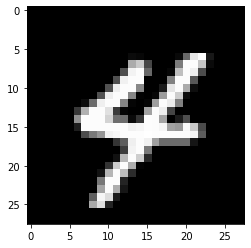

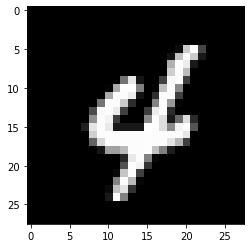

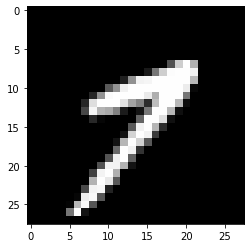

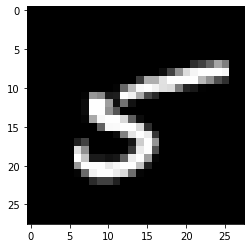

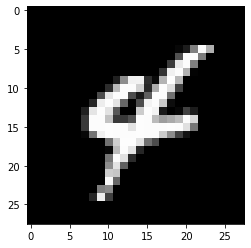

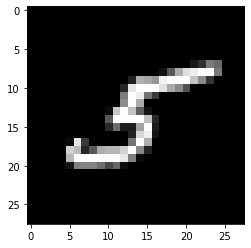

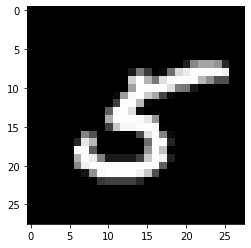

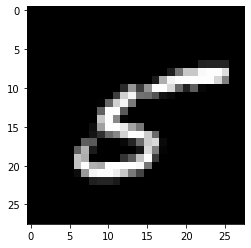

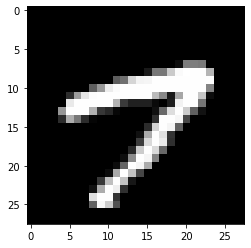

k= 1


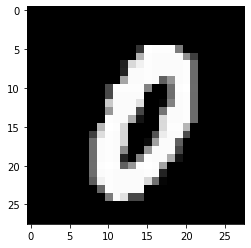

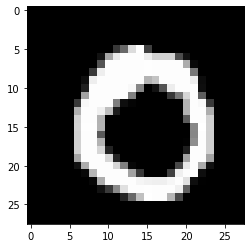

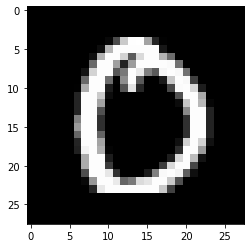

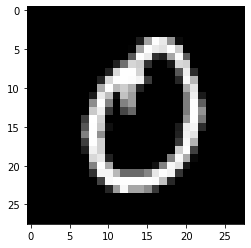

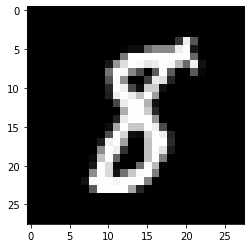

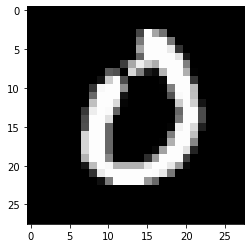

k= 2


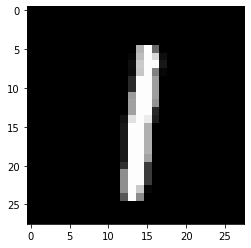

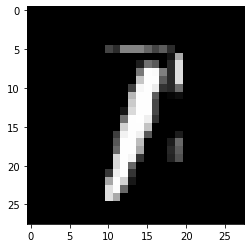

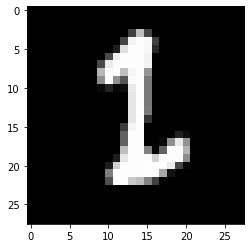

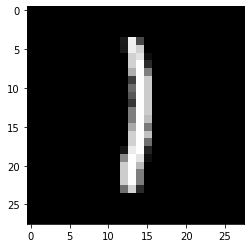

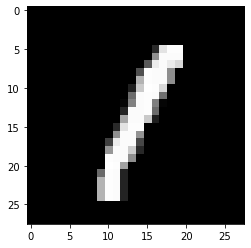

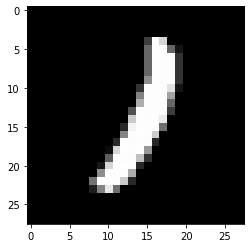

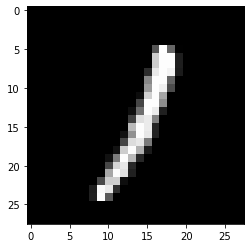

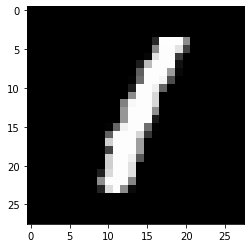

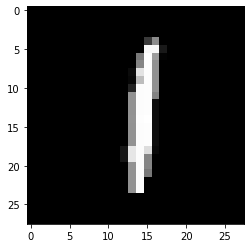

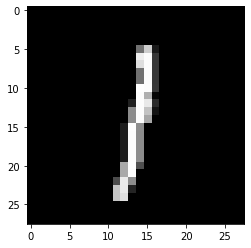

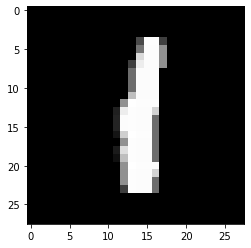

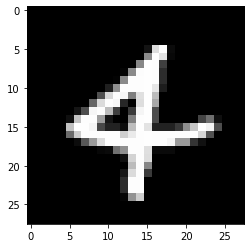

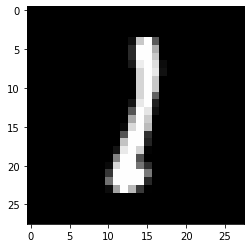

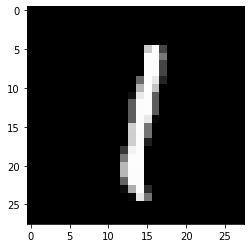

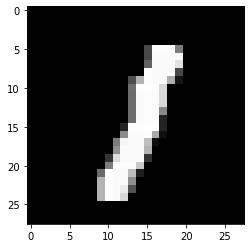

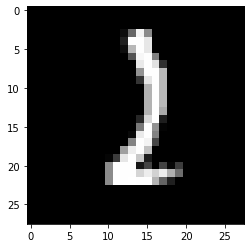

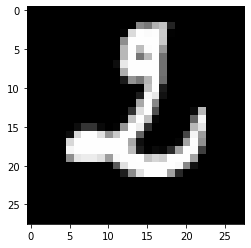

k= 3


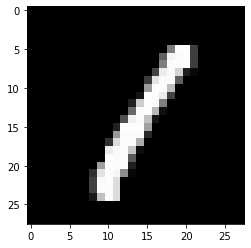

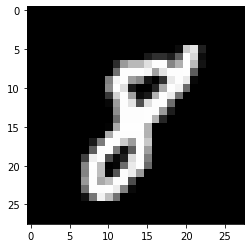

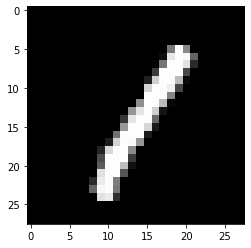

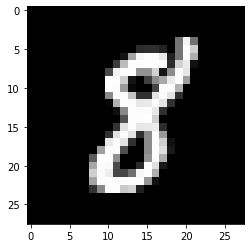

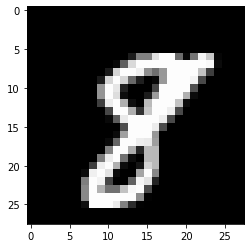

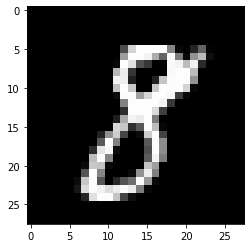

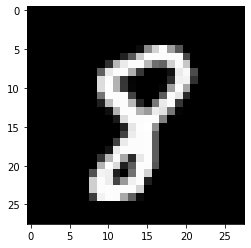

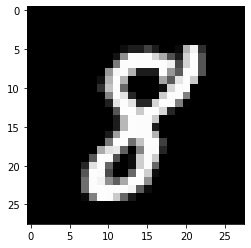

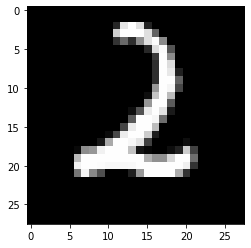

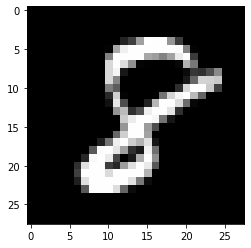

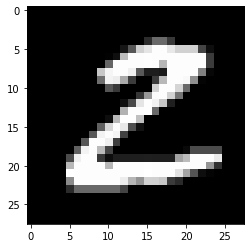

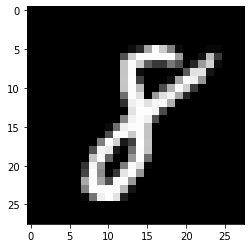

k= 4


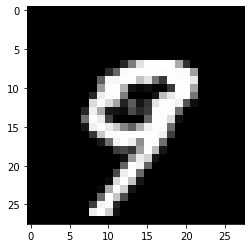

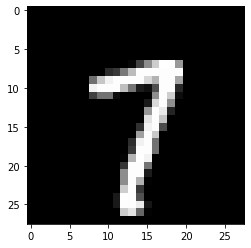

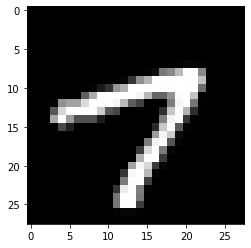

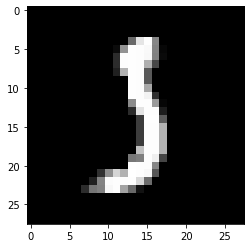

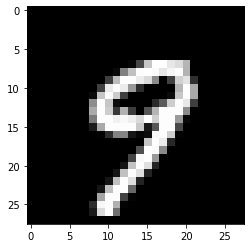

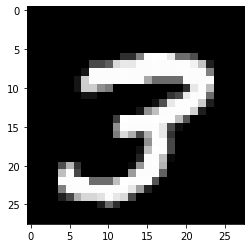

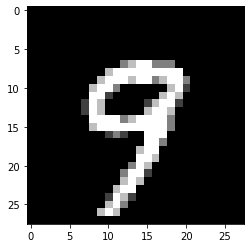

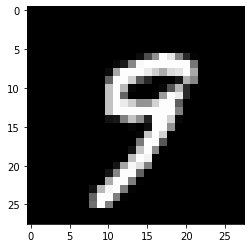

k= 5
k= 6


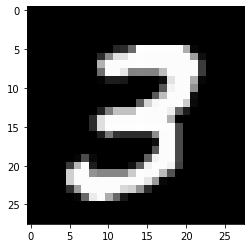

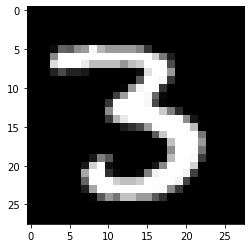

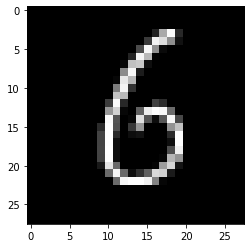

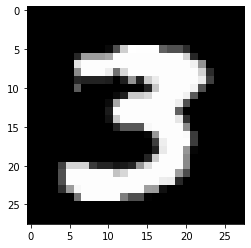

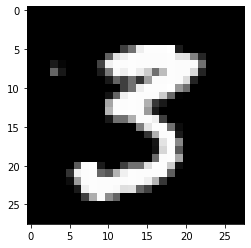

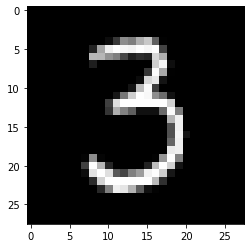

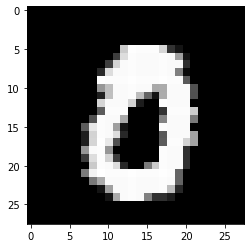

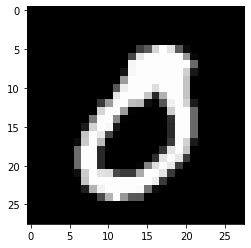

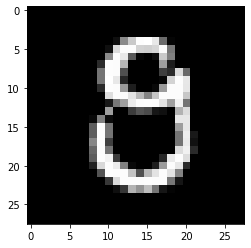

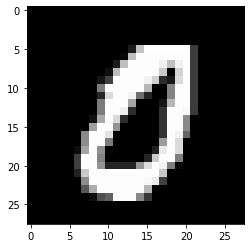

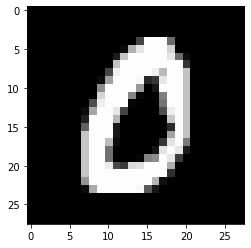

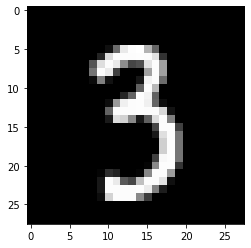

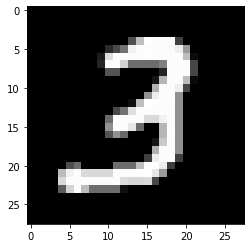

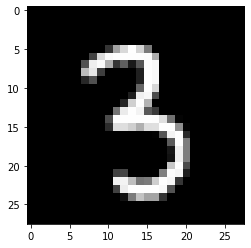

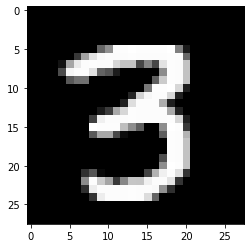

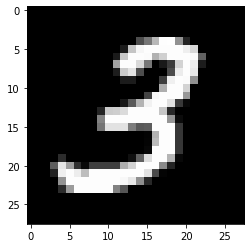

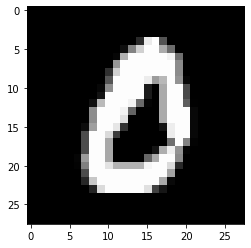

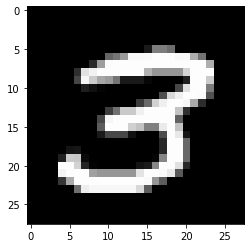

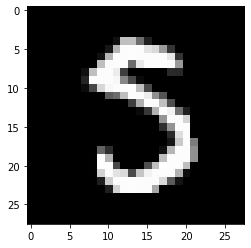

k= 7


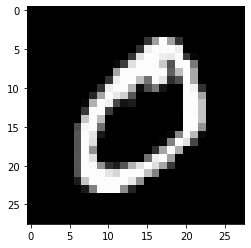

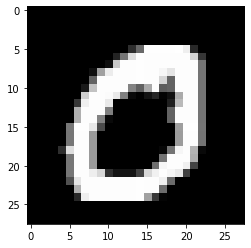

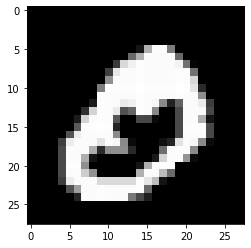

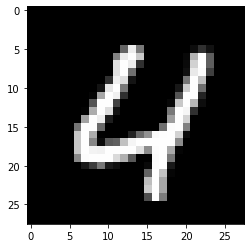

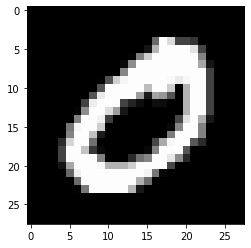

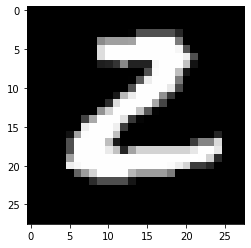

k= 8


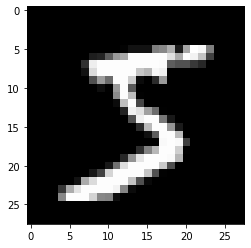

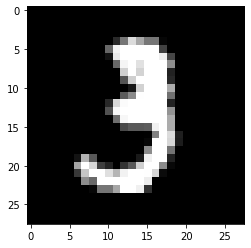

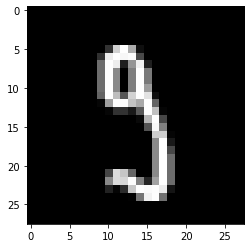

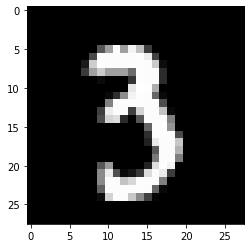

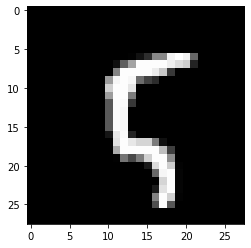

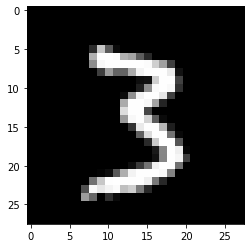

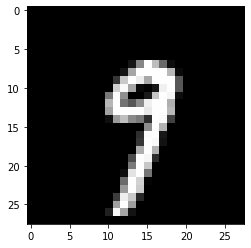

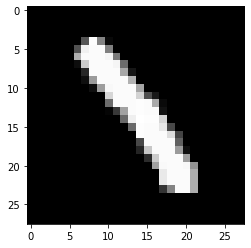

k= 9


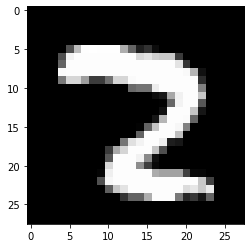

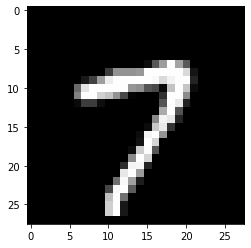

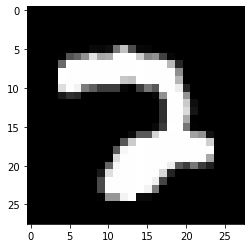

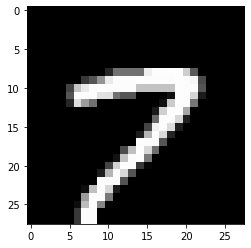

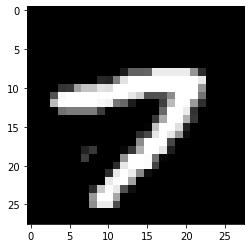

k= 10
k= 11
k= 12


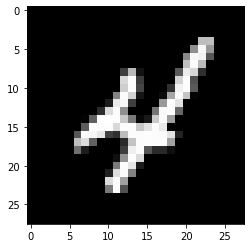

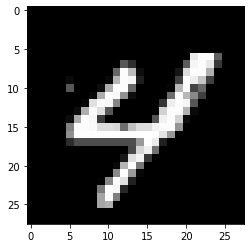

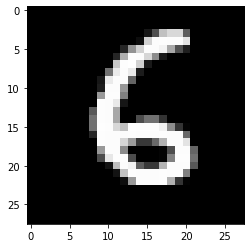

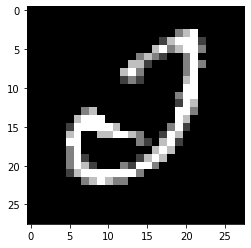

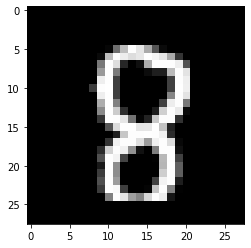

k= 13


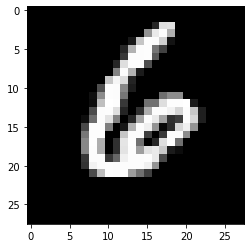

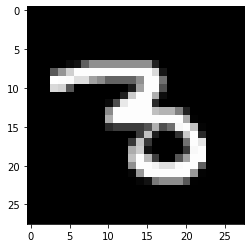

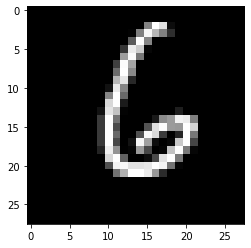

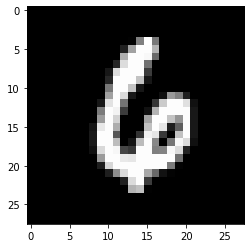

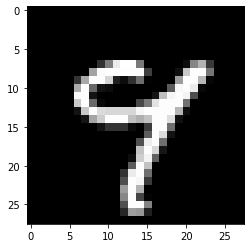

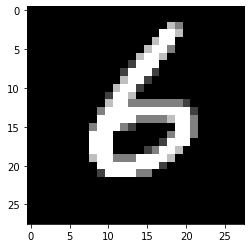

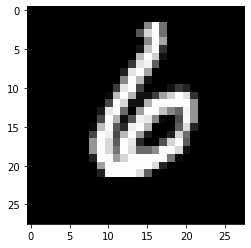

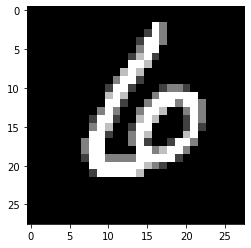

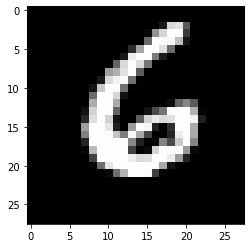

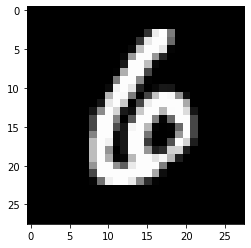

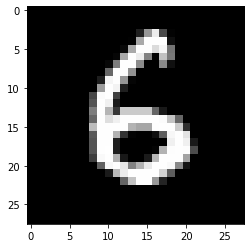

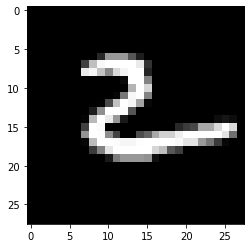

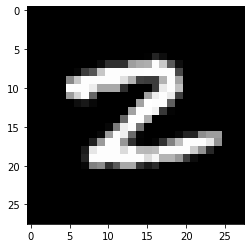

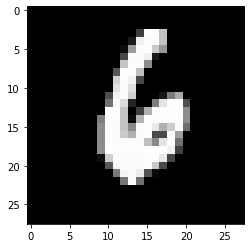

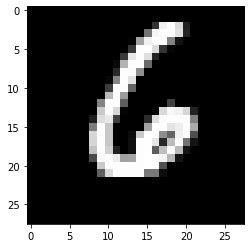

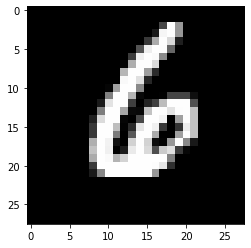

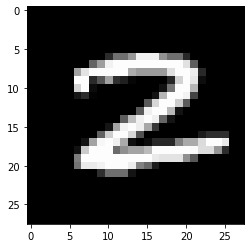

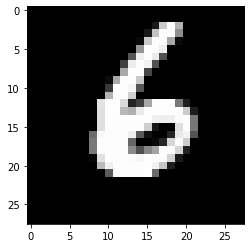

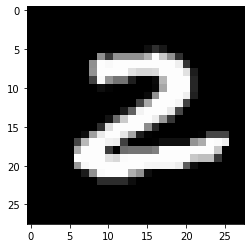

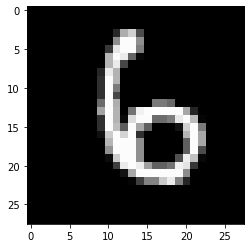

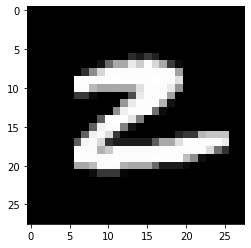

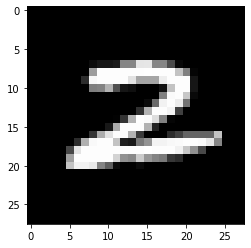

k= 14
k= 15
k= 16
k= 17
k= 18


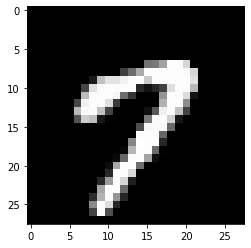

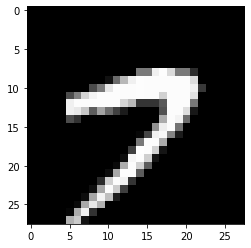

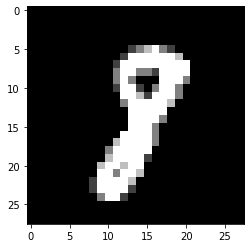

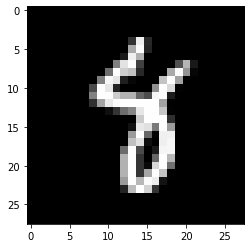

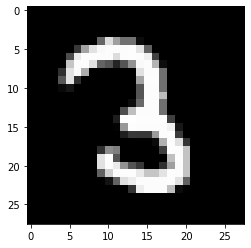

k= 19
k= 20
k= 21
k= 22


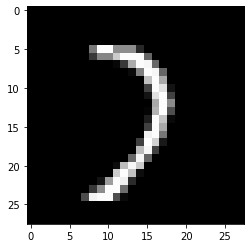

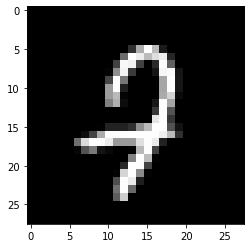

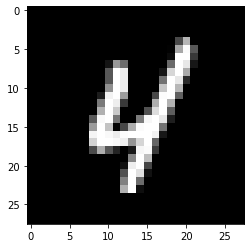

k= 23


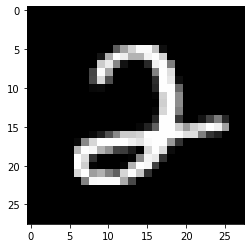

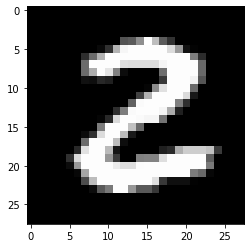

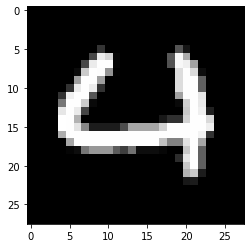

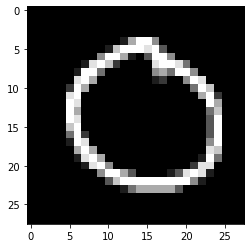

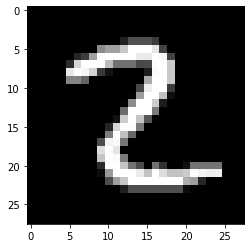

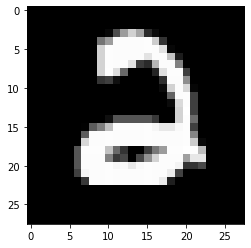

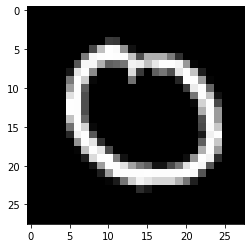

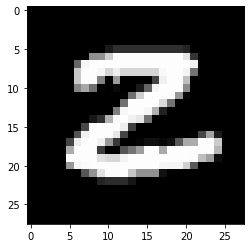

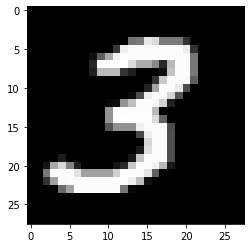

k= 24
k= 25


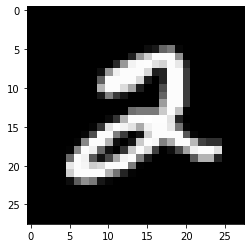

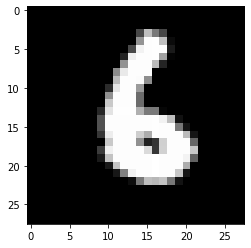

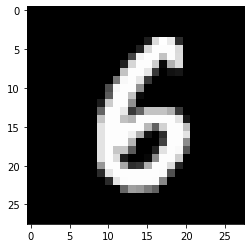

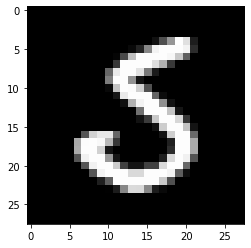

k= 26
k= 27


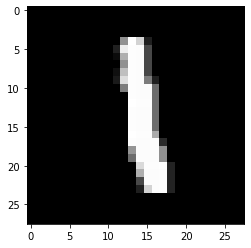

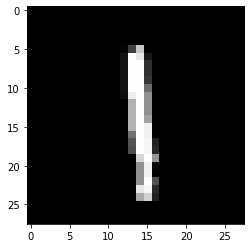

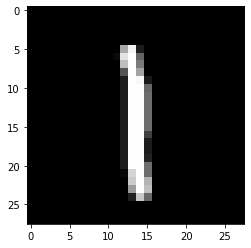

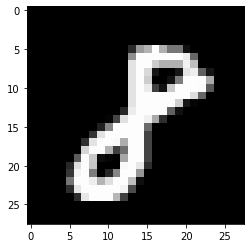

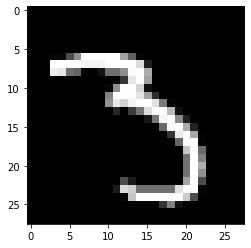

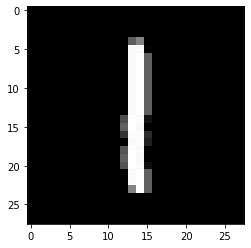

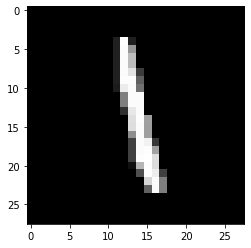

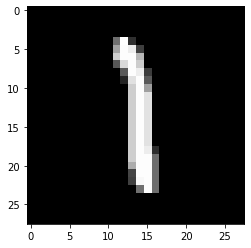

k= 28
k= 29


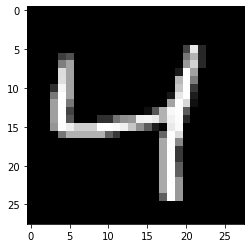

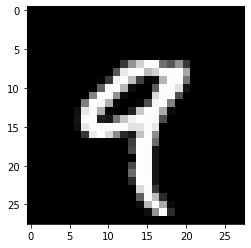

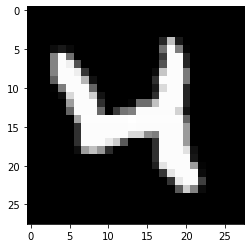

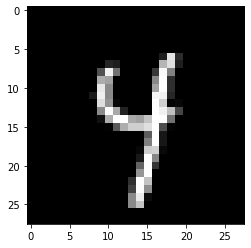

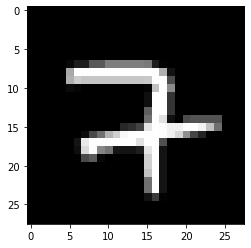

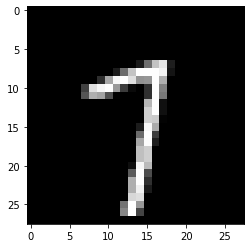

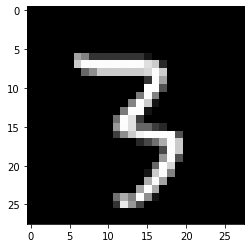

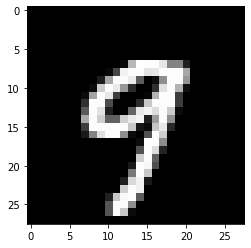

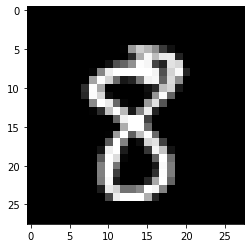

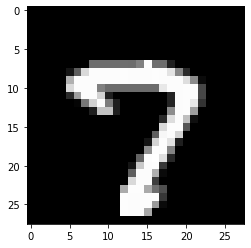

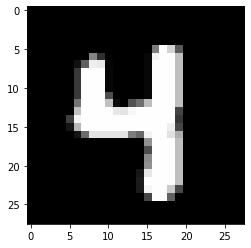

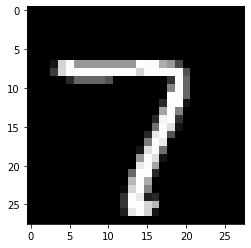

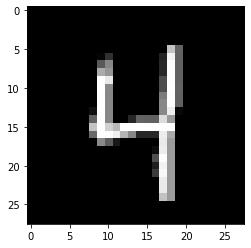

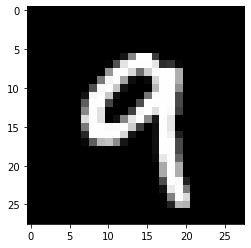

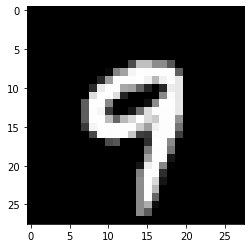

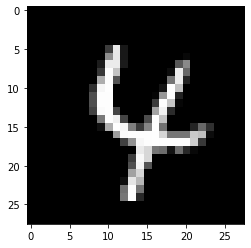

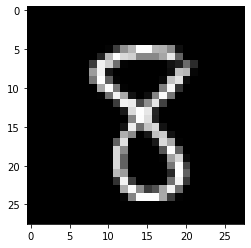

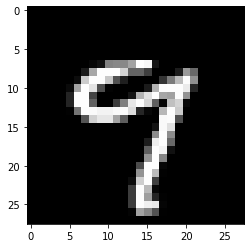

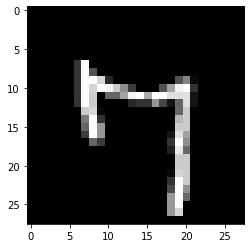

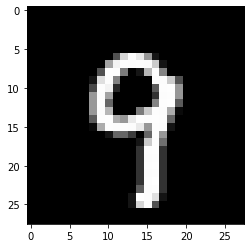

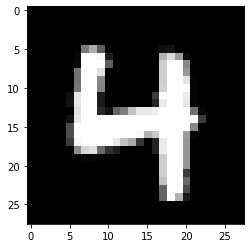

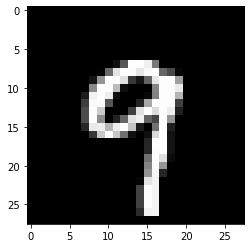

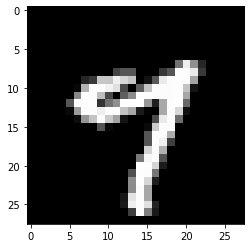

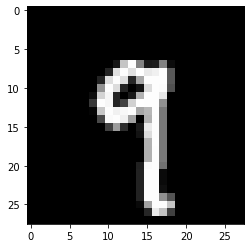

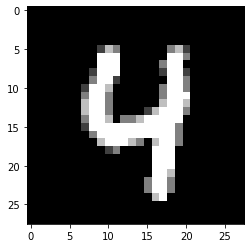

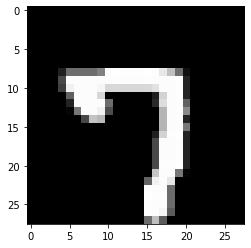

k= 30


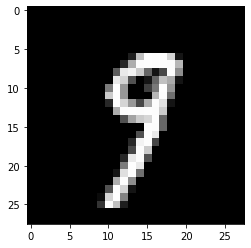

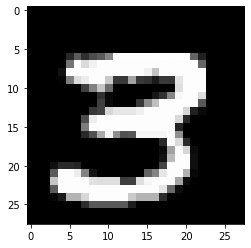

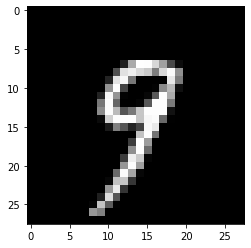

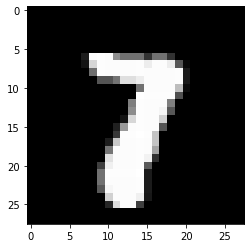

k= 31


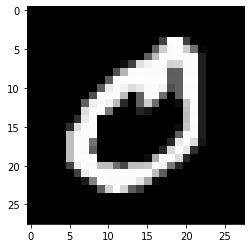

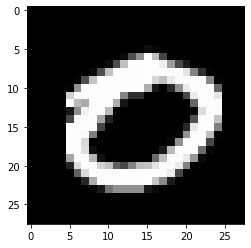

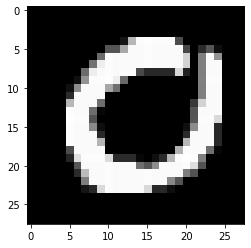

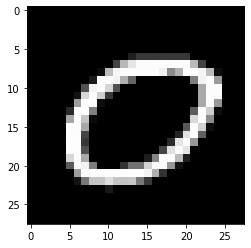

In [16]:
print('Shape is ', encoded_features.shape)
cluster = encoded_features.argmax(axis=1)
#print(cluster)
#print(cluster[cluster==0])
for k in range(encoding_dim):
    print('=============================================')
    print('k=', k)
    print('=============================================')
    for i in range(200):
        cl = cluster[i]
        if (cl==k):
            plt.imshow(x_train[i].reshape(28, 28))
            plt.show()